In [2]:
#Exercise 4
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/C13550/Lesson02/Exercise04/

/content/drive/My Drive/C13550/Lesson02/Exercise04


In [0]:
import numpy as np  #Numpy
import cv2          #OpenCV
from matplotlib import pyplot as plt #Matplotlib
count = 0

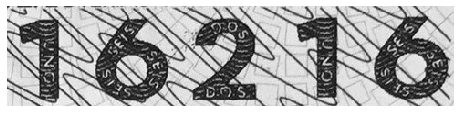

In [5]:
img = cv2.imread('number.jpg',0)
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

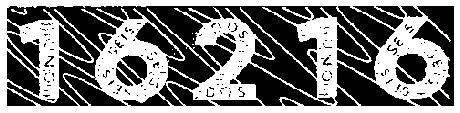

In [6]:
_,th1=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th1 = (255-th1) 
# This step changes the black with white and viceversa in order to have white figures
plt.imshow(th1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

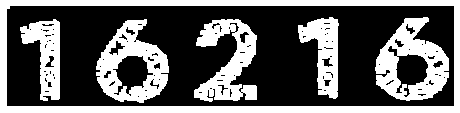

In [7]:
open1 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, np.ones((4, 4),np.uint8))
plt.imshow(open1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

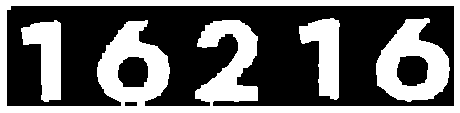

In [8]:
close1 = cv2.morphologyEx(open1, cv2.MORPH_CLOSE, np.ones((8, 8), np.uint8))
plt.imshow(close1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

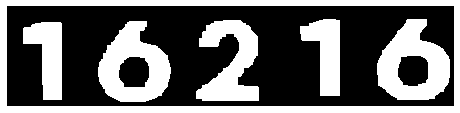

In [9]:
open2 = cv2.morphologyEx(close1, cv2.MORPH_OPEN,np.ones((7,12),np.uint8))
plt.imshow(open2,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

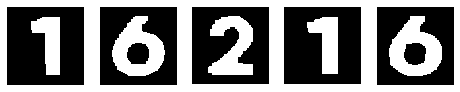

In [10]:
_, contours, _= cv2.findContours(open2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Find contours
cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True) #Sort the contours
cntsLength = len(cntsSorted)
images = []
for idx in range(cntsLength): #Iterate over the contours
    contour_no = contours[idx] #Get the first number
    
    #if cv2.contourArea(contour_no) < 1000: #If the area is less than 1000, it's not a number
    #    continue
    
    x, y, w, h = cv2.boundingRect(contour_no) #Get its position and size
    no_tl = (x, y)
    no_br = (x + w, y + h)
    
    sample_no = open2[no_tl[1]:no_br[1], no_tl[0]:no_br[0]] #Crop the number from the original image
    
    # Good squared
    offset_reference = max(sample_no.shape[0], sample_no.shape[1])
    pad_offset_height = (offset_reference - sample_no.shape[0]) // 2
    pad_offset_width = (offset_reference - sample_no.shape[1]) // 2
    sample_no = np.pad(sample_no,
                       [(pad_offset_height, pad_offset_height), (pad_offset_width, pad_offset_width)],
                       mode='constant')  # height_b, height_a, width_b, width_a
    # Margin
    pad_height = int(sample_no.shape[0] / 6)
    pad_width = int(sample_no.shape[1] / 6)
    sample_no = np.pad(sample_no, [(pad_height, pad_height), (pad_width, pad_width)],
                       mode='constant')  # height_b, height_a, width_b, width_a
    
    images.append([x,sample_no]) #Add the image to the list of images and the X position
images = sorted(images, key=lambda x: x[0]) #Sort the list of images using the X position
imagesLength = len(images)
for idx in range(imagesLength):
    plt.subplot(1,imagesLength,idx+1),plt.imshow(images[idx][1],'gray') #Add every number to the plot
    plt.xticks([]),plt.yticks([]) #Delete the axis
    cv2.imwrite('number%d.jpg' % (count),images[idx][1])
    count+=1
#plt.savefig('ex4_6.jpg', bbox_inches='tight')
plt.show()

In [0]:
#Exercise 5
import random
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import os
import re
random.seed(42)


In [12]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


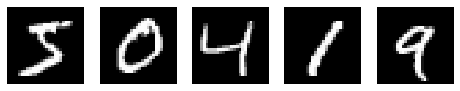

In [13]:
for idx in range(5):
    rnd_index = random.randint(0, 59999)
    plt.subplot(1,5,idx+1),plt.imshow(x_train[idx],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
def list_files(directory, ext=None):
    return [os.path.join(directory, f) for f in os.listdir(directory)
            if os.path.isfile(os.path.join(directory, f)) and ( ext==None or re.match('([\w_-]+\.(?:' + ext + '))', f) )]

# ----------------------------------------------------------------------------
def load_images(path,label,maximum):
    X = []
    Y = []
    label = str(label)
    for fname in list_files( path, ext='jpg' ): 
        img = cv2.imread(fname,0)
        img = cv2.resize(img, (28, 28))
        X.append(img)
        Y.append(label)

    if maximum != -1 :
        X = X[:maximum]
        Y = Y[:maximum]
        
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    return X, Y



In [15]:
print(x_train.shape)
print(x_test.shape)
X, Y = load_images('Dataset/%d'%(0),0,9)
for digit in range(1,10):
  X_aux, Y_aux = load_images('Dataset/%d'%(digit),digit,9)
  print(X_aux.shape)
  X = np.concatenate((X, X_aux), axis=0)
  Y = np.concatenate((Y, Y_aux), axis=0)
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2)
x_train = np.concatenate((x_train, x_tr), axis=0)
y_train = np.concatenate((y_train, y_tr), axis=0)
x_test = np.concatenate((x_test, x_te), axis=0)
y_test = np.concatenate((y_test, y_te), axis=0)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(9, 28, 28)
(9, 28, 28)
(9, 28, 28)
(9, 28, 28)
(9, 28, 28)
(9, 28, 28)
(9, 28, 28)
(9, 28, 28)
(9, 28, 28)
(60072, 28, 28)
(10018, 28, 28)


In [16]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60072, 784)
(10018, 784)


In [17]:
print ("Applying Decision Tree...")
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

Applying Decision Tree...


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
print ("Applying RandomForest...")
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

Applying RandomForest...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
print ("Applying Adaboost...")
adaboost = AdaBoostClassifier(rfc,n_estimators=10)
adaboost.fit(x_train, y_train)

Applying Adaboost...


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [20]:
print ("Making predictions...")
y_pred = rfc.predict(x_test)
#y_pred = y_pred.astype(np.int)

print (y_pred)
print (y_test)

# Evaluate the prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
precision, recall, f1, support = metrics.precision_recall_fscore_support(y_test, y_pred, average=None)
print('\nFinal results...')
print(metrics.classification_report(y_test, y_pred))
print('Acc      : %.4f' % accuracy)
print('Precision: %.4f' % np.average(precision))
print('Recall   : %.4f' % np.average(recall))
print('F1       : %.4f' % np.average(f1))
print('Support  :', np.sum(support))

Making predictions...
['7' '2' '1' ... '0' '4' '9']
['7' '2' '1' ... '0' '4' '9']

Final results...
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       982
           1       0.98      0.99      0.98      1138
           2       0.93      0.95      0.94      1034
           3       0.91      0.92      0.92      1012
           4       0.94      0.95      0.95       984
           5       0.94      0.92      0.93       896
           6       0.97      0.97      0.97       958
           7       0.95      0.95      0.95      1029
           8       0.94      0.91      0.92       975
           9       0.94      0.91      0.93      1010

   micro avg       0.95      0.95      0.95     10018
   macro avg       0.95      0.95      0.95     10018
weighted avg       0.95      0.95      0.95     10018

Acc      : 0.9467
Precision: 0.9463
Recall   : 0.9460
F1       : 0.9461
Support  : 10018


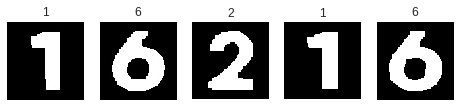

In [21]:
for number in range(5):
  imgLoaded = cv2.imread('number%d.jpg'%(number),0)
  img = cv2.resize(imgLoaded, (28, 28))
  img = img.flatten()
  img = img.reshape(1,-1)
  plt.subplot(1,5,number+1),
  plt.imshow(imgLoaded,'gray')
  plt.title(rfc.predict(img)[0])
  plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
#Exercise 6
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adadelta
from keras import utils as np_utils

In [23]:
x_train = (x_train.astype(np.float32))/255.0
x_test = (x_test.astype(np.float32))/255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
input_shape = x_train.shape[1:]
print(input_shape)
print(x_train.shape)


(28, 28, 1)
(60072, 28, 28, 1)


In [24]:
model = Sequential()
model.add(Dense(512, input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation="softmax"))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

In [0]:
ckpt = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_loss', mode='min', save_weights_only=False)

In [27]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test), callbacks=[ckpt])

Instructions for updating:
Use tf.cast instead.
Train on 60072 samples, validate on 10018 samples
Epoch 1/10
60072/60072 [==============================] - 364s 6ms/step - loss: 0.2190 - acc: 0.9349 - val_loss: 0.1046 - val_acc: 0.9682
Epoch 2/10
60072/60072 [==============================] - 417s 7ms/step - loss: 0.1037 - acc: 0.9690 - val_loss: 0.0898 - val_acc: 0.9719
Epoch 3/10
60072/60072 [==============================] - 391s 7ms/step - loss: 0.0714 - acc: 0.9784 - val_loss: 0.0773 - val_acc: 0.9782
Epoch 4/10
60072/60072 [==============================] - 262s 4ms/step - loss: 0.0502 - acc: 0.9849 - val_loss: 0.0808 - val_acc: 0.9767
Epoch 5/10
60072/60072 [==============================] - 261s 4ms/step - loss: 0.0373 - acc: 0.9886 - val_loss: 0.0786 - val_acc: 0.9768
Epoch 6/10
60072/60072 [==============================] - 261s 4ms/step - loss: 0.0297 - acc: 0.9908 - val_loss: 0.0758 - val_acc: 0.9788
Epoch 7/10
60072/60072 [==============================] - 262s 4ms/step - 

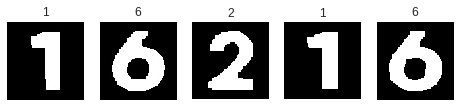

In [28]:
for number in range(5):
  imgLoaded = cv2.imread('number%d.jpg'%(number),0)
  img = cv2.resize(imgLoaded, (28, 28))
  img = (img.astype(np.float32))/255.0
  img = img.reshape(1, 28, 28, 1)
  plt.subplot(1,5,number+1),plt.imshow(imgLoaded,'gray')
  plt.title(np.argmax(model.predict(img)[0]))
  plt.xticks([]),plt.yticks([])
plt.show()
